<a href="https://colab.research.google.com/github/visualdatabase/fastdup/blob/main/examples/fastdup_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fastdup Tutorial: Analyze Video

In [ ]:
!pip install -U fastdup


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50.0 MB 61 kB/s 


## Download Sample dataset

In [ ]:
!mc cp --recursive google/visual_db/datasets/index-videos .
# Data is found here: https://github.com/4ML-platform/ndvr

`google/visual_db/datasets/index-videos/index-videos/blackborder.bmw.mp4` -> `index-videos/index-videos/blackborder.bmw.mp4`
`google/visual_db/datasets/index-videos/index-videos/blackborder.garba.mp4` -> `index-videos/index-videos/blackborder.garba.mp4`
`google/visual_db/datasets/index-videos/index-videos/blackborder.iron-man.mp4` -> `index-videos/index-videos/blackborder.iron-man.mp4`
`google/visual_db/datasets/index-videos/index-videos/blackborder.messi.mp4` -> `index-videos/index-videos/blackborder.messi.mp4`
`google/visual_db/datasets/index-videos/index-videos/blackborder.messivskids.mp4` -> `index-videos/index-videos/blackborder.messivskids.mp4`
`google/visual_db/datasets/index-videos/index-videos/blackborder.superman.mp4` -> `index-videos/index-videos/blackborder.superman.mp4`
`google/visual_db/datasets/index-videos/index-videos/cropper.bmw.mp4` -> `index-videos/index-videos/cropper.bmw.mp4`
`google/visual_db/datasets/index-videos/index-videos/cropper.garba.mp4` -> `index-videos/

## Run Fastdup to gain insights from video

## Extract feature vectors from Video

Note: video extraction is slow on the free Colab notebook as only 1 core is used. It is recommended to run on a 32 core machine to speed up extraction.

In [ ]:
%pip install wurlitzer
%load_ext wurlitzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!rm -fr out
# run fastdup to extract key frames from video. num_images=3 means we run on the first 3 videos.
import fastdup 
fastdup.run('index-videos', work_dir='out',verbose=0, run_mode=1, nearest_neighbors_k=10,threshold=0.8, turi_param='ccthreshold=0.85')

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
Found resent/efficientnet model, setting up normalization
Going to loop over dir index-videos
Found total 24 videos to run on


0

## Build nearest neighbor model

In [ ]:

fastdup.run('index-videos', work_dir='out', run_mode=2, nearest_neighbors_k=10,threshold=0.8, turi_param='ccthreshold=0.85')

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
Found resent/efficientnet model, setting up normalization
Found total 1123 images to run on
334) Finished write_index() NN model
Stored nn model index file out/nnf.index
1667224049 : INFO:     (add_vertices:460): Num vertices for group 0: 1123
1667224049 : INFO:     (commit_edge_buffer:609): In commit edge buffer (0,0)
1667224049 : INFO:     (commit_edge_buffer:680): Shuffling edges ...
1667224049 : INFO:     (commit_edge_buffer:688): Done shuffling edges in 0.018706 secs
1667224049 : INFO:     (commit_edge_buffer:692): Aggregating unique vertices...
1667224049 : INFO:     (commit_edge_buffer:705): Done aggregating unique vertex in 0.001766 secs
1667224049 : INFO:     (commit_edge_buffer:713): Combine vertex data
1667224049 : INFO:     (commit_edge_buffer:779): Done phase 2 in 0.001201 secs
1667224049 : INFO:     (commit_edge_buffer:787): Rename id columns 
1667224049 : INFO:     (commit_edge_buffer:890): Done i

0

## Find similarities across different videos

In [ ]:
import os
fastdup.create_duplicate_videos_gallery('out', save_path='.', num_images=50, get_reformat_filename_func=lambda x: os.path.dirname(x).replace('out/tmp/index-videosindex-videosindex-videos',''))

100%|██████████| 50/50 [00:00<00:00, 173.35it/s]


Stored similarity visual view in  ./similarity.html
Warning, failed to remove image file  ./output_000043_output_000032.jpg  with error  [Errno 2] No such file or directory: './output_000043_output_000032.jpg'


0

Report structure
- Image - image of the two similar frames to the left and center, and blend of the two of them in the right
- Distance - the similarity between frames where 1 is identical and 0 is completely different
- From - first video name
- To - second video name
- counts - number of similar frames observed in this video pair


,Image,Distance,From,To,counts
0,,0.999918,out/tmp/index-videosindex-videoscropper.messivskids.mp4,out/tmp/index-videosindex-videosspeeder.messivskids.mp4,65
2,,0.978299,out/tmp/index-videosindex-videosspeeder.garba.mp4,out/tmp/index-videosindex-videosblackborder.garba.mp4,4
4,,0.956496,out/tmp/index-videosindex-videosspeeder.superman.mp4,out/tmp/index-videosindex-videoscropper.superman.mp4,74
6,,0.938353,out/tmp/index-videosindex-videosblackborder.bmw.mp4,out/tmp/index-videosindex-videosspeeder.bmw.mp4,23
8,,0.932112,out/tmp/index-videosindex-videosblackborder.iron-man.mp4,out/tmp/index-videosindex-videosspeeder.iron-man.mp4,26
10,,0.923943,out/tmp/index-videosindex-videoscropper.messi.mp4,out/tmp/index-videosindex-videosspeeder.messi.mp4,54
12,,0.922935,out/tmp/index-videosindex-videosspeeder.messi.mp4,out/tmp/index-videosindex-videosblackborder.messi.mp4,15
14,,0.914884,out/tmp/index-videosindex-videosblackborder.garba.mp4,out/tmp/index-videosindex-videoscropper.garba.mp4,4
16,,0.906030,out/tmp/index-videosindex-videosrotator90.bmw.mp4,out/tmp/index-videosindex-videosblackborder.bmw.mp4,7
18,,0.904807,out/tmp/index-videosindex-videosspeeder.garba.mp4,out/tmp/index-videosindex-videoscropper.garba.mp4,43

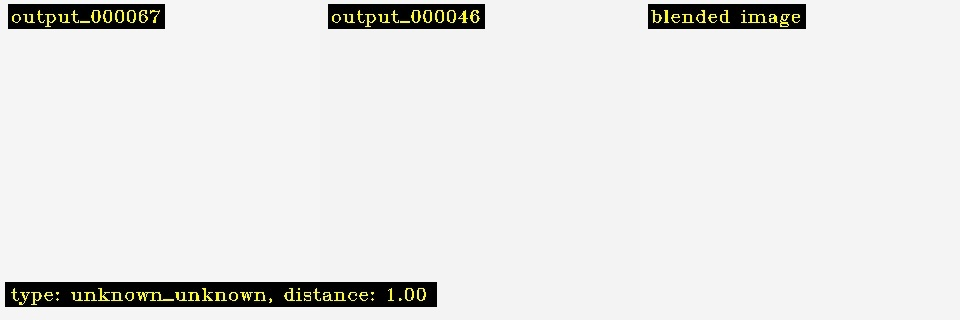
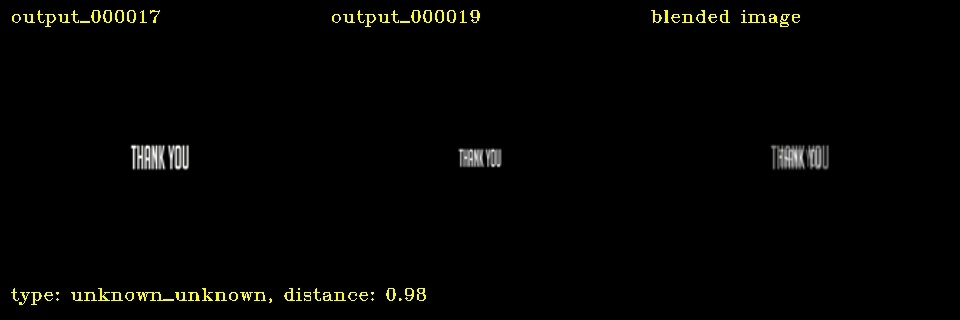
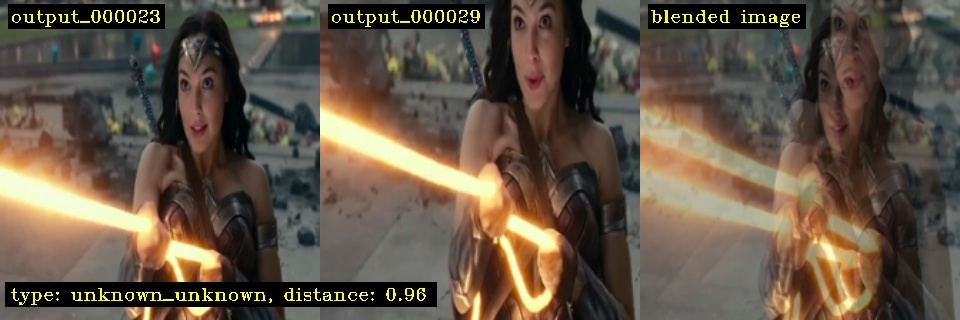
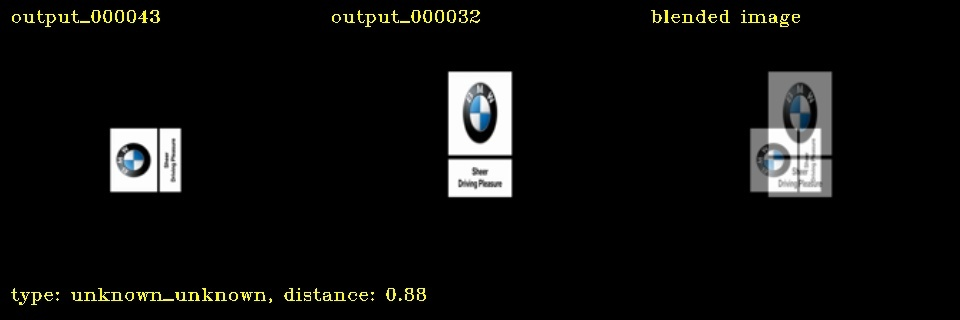
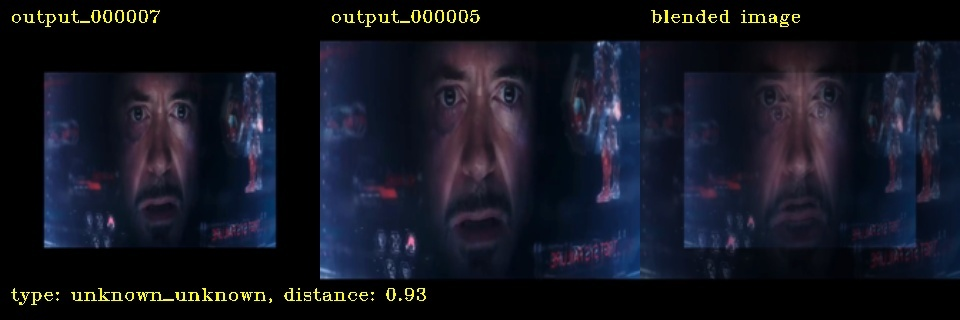
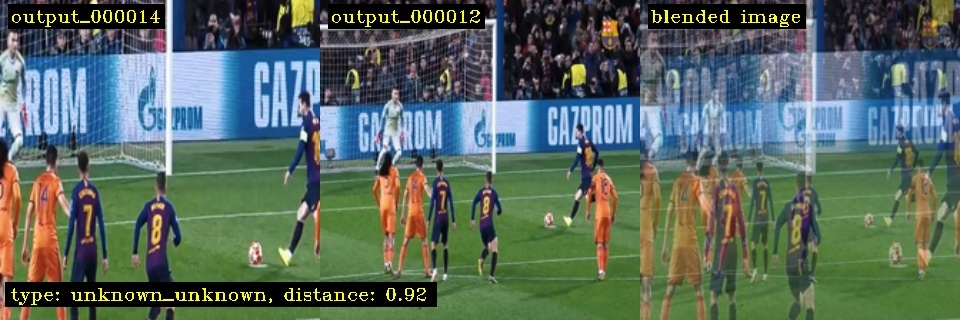
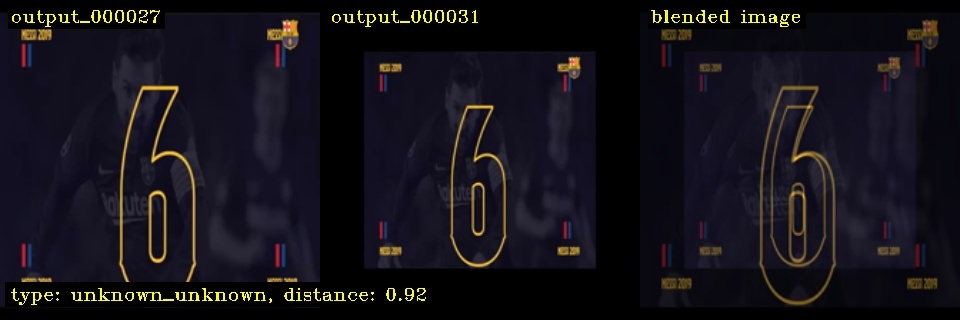
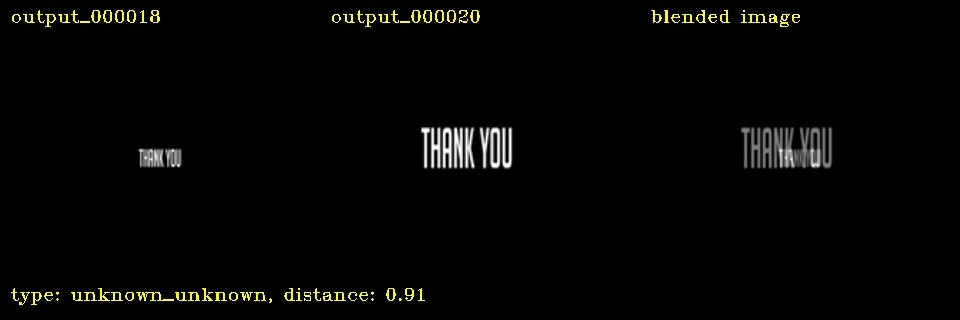
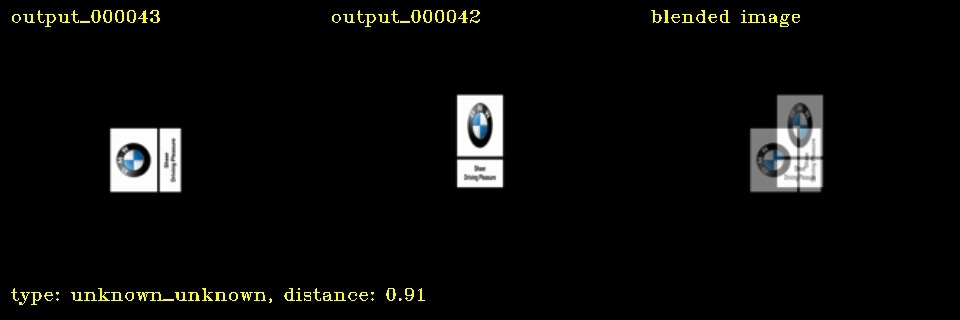
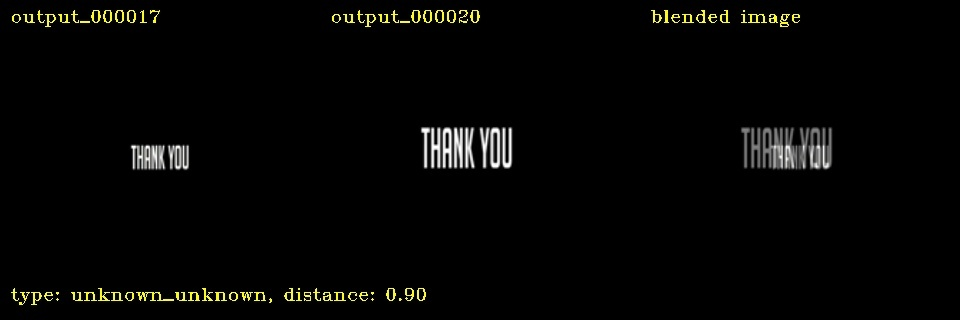
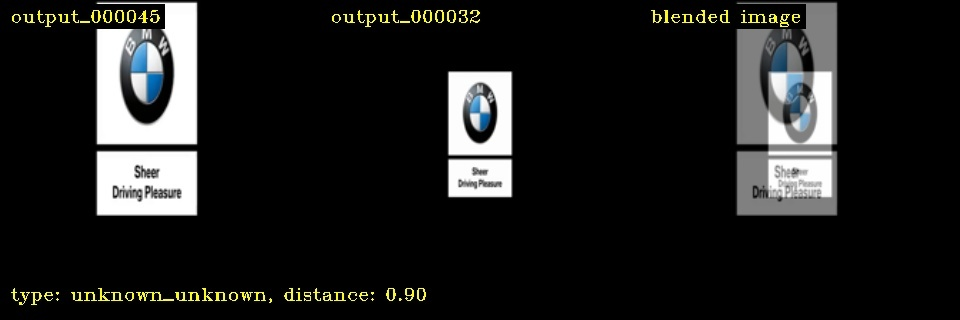
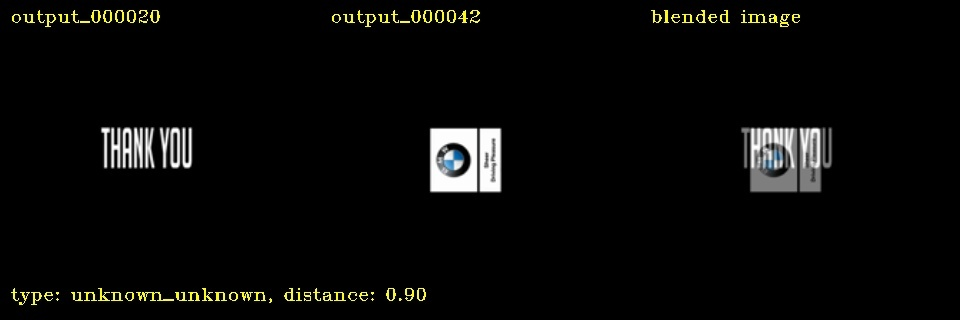
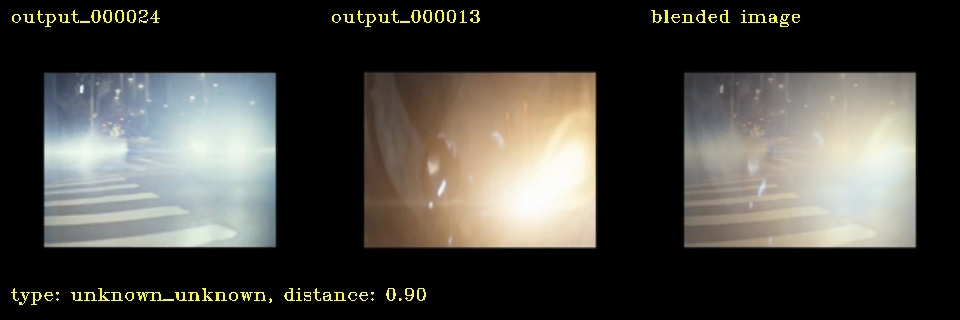
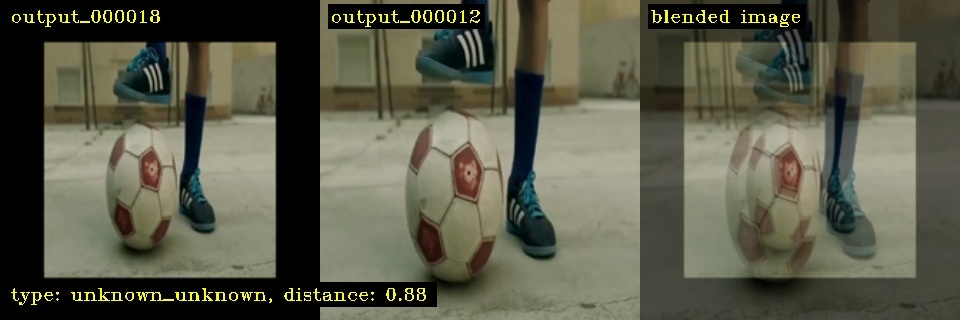
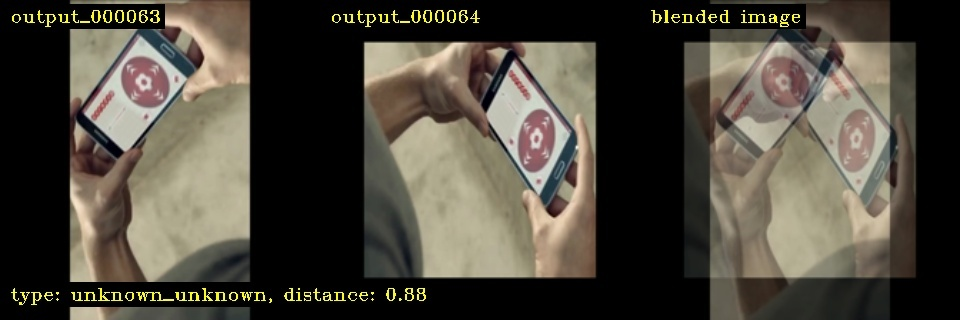
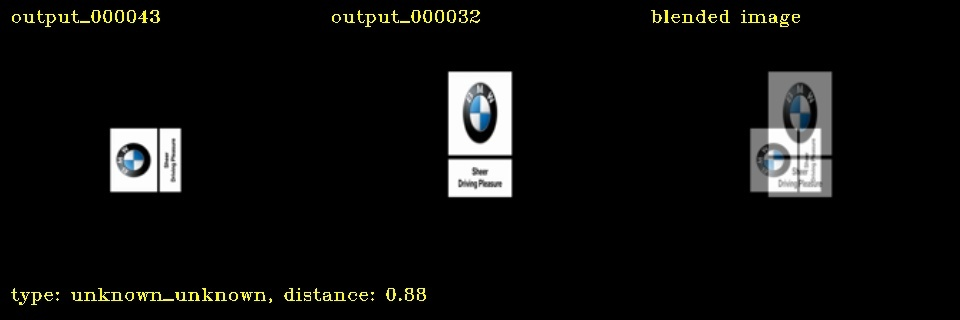
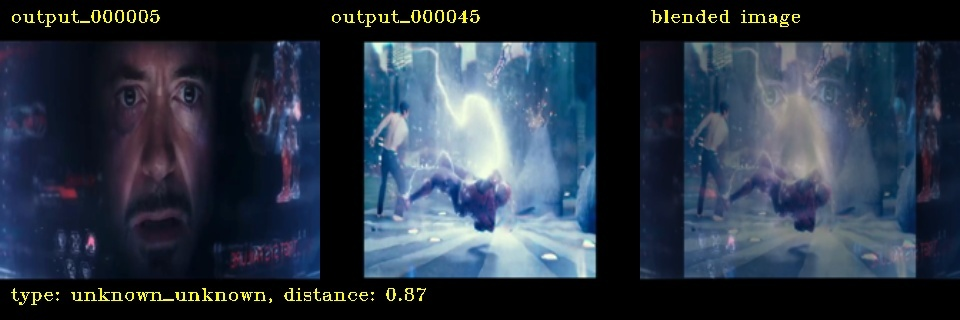
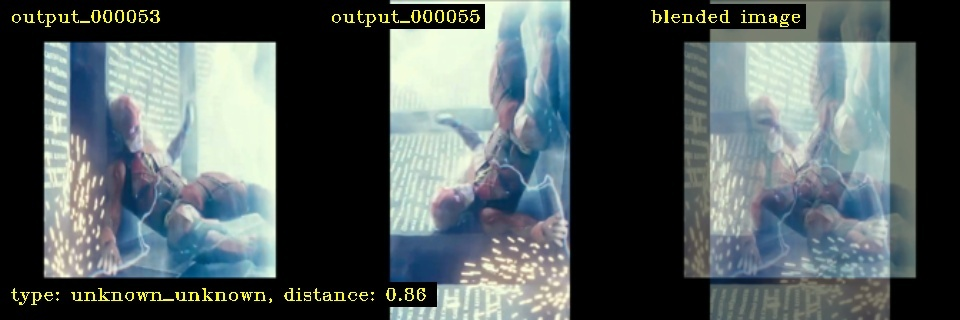
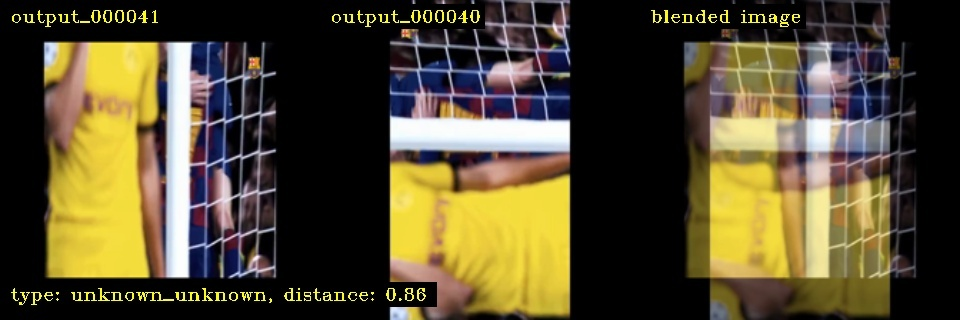
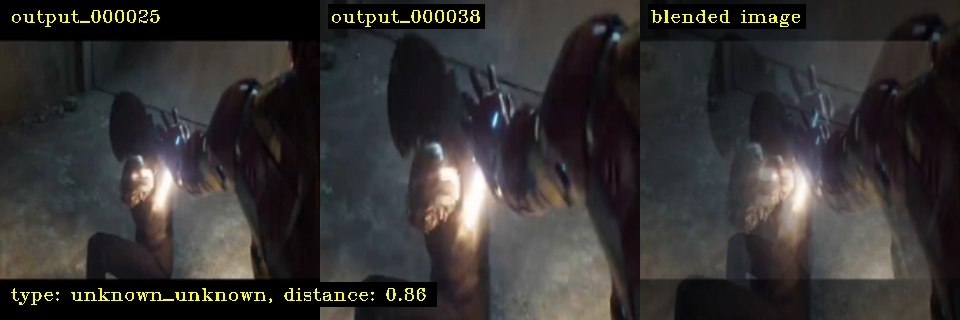
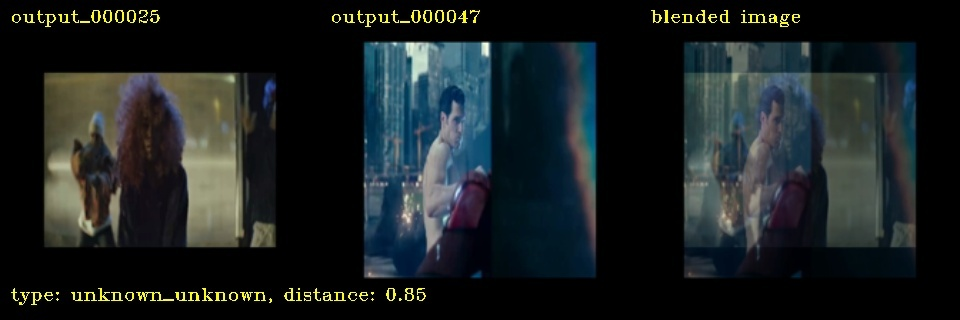
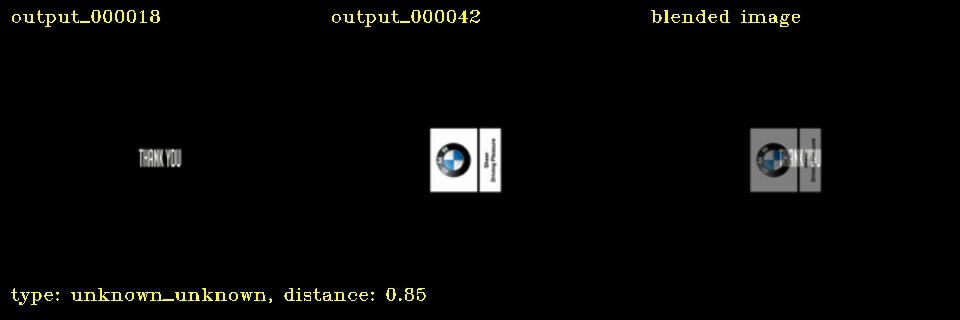
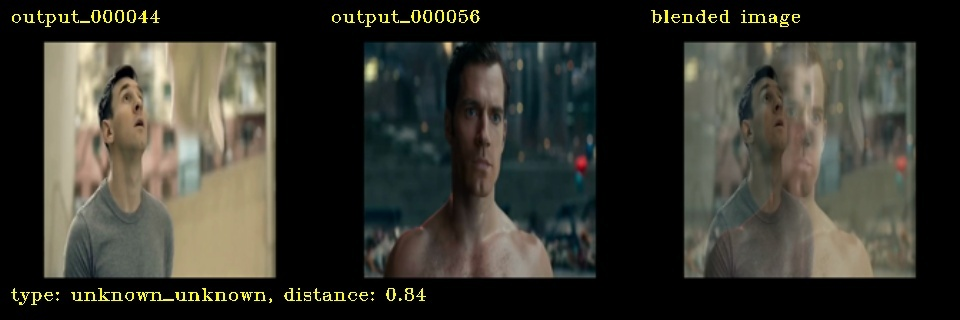
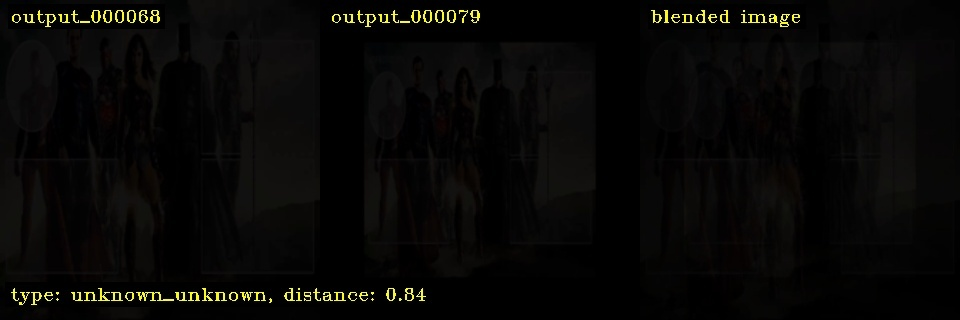
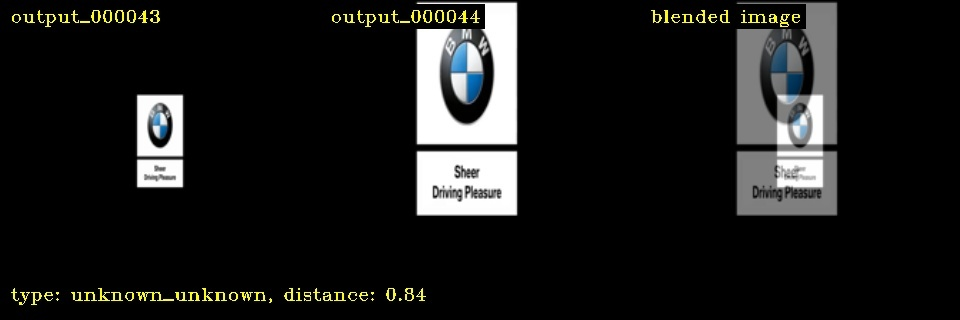

In [ ]:
from IPython.display import HTML
HTML('similarity.html')

Failed to read config file ./config.json


100%|██████████| 20/20 [00:03<00:00,  5.46it/s]


Finished OK. Components are stored as image files ./components_[index].jpg
Stored components visual view in  ./components.html
Execution time in seconds 8.9


0

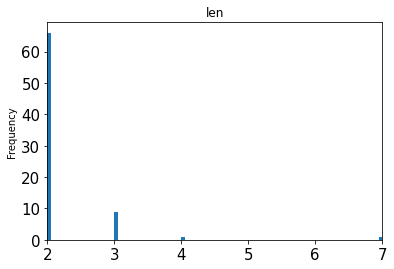

In [ ]:
fastdup.create_component_videos_gallery('out','.')

# Now let's examine the components of similar videos
Each table row groups together a collection of similar videos.
- num_videos - the total number of videos grouped together in this group
- num_images - the total number of frames similar across videos (two videos may have multiple similar frames)
 


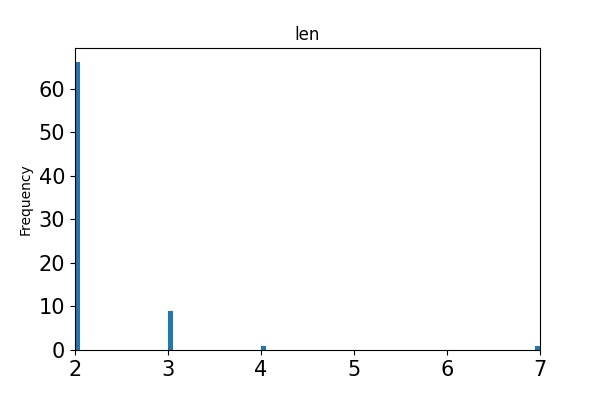
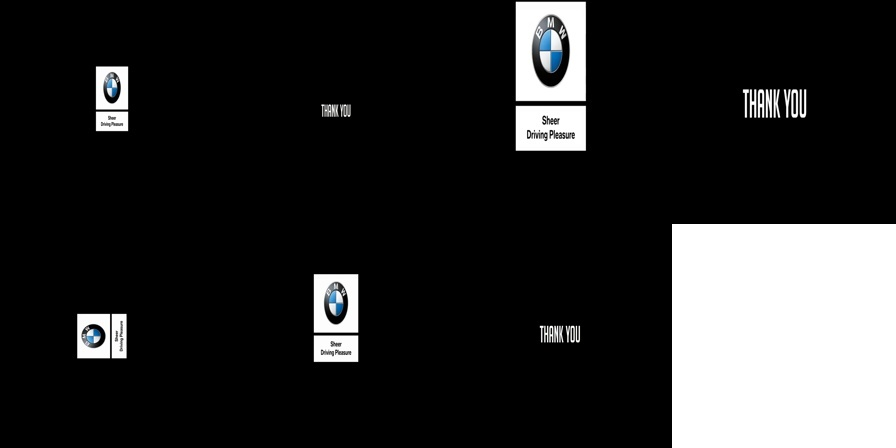
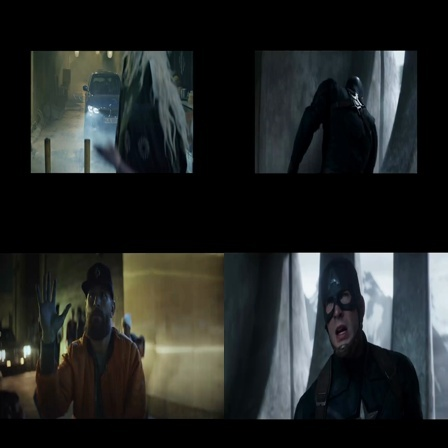
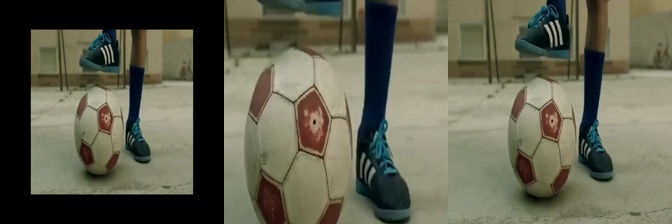
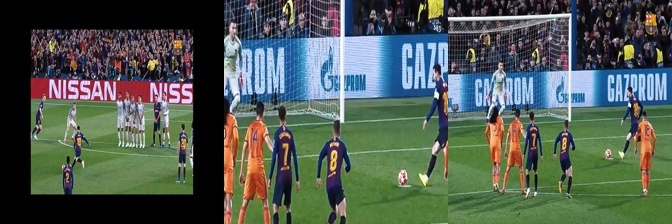
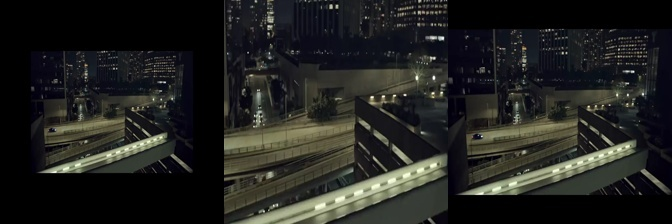
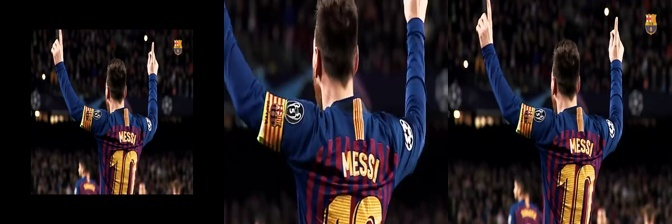
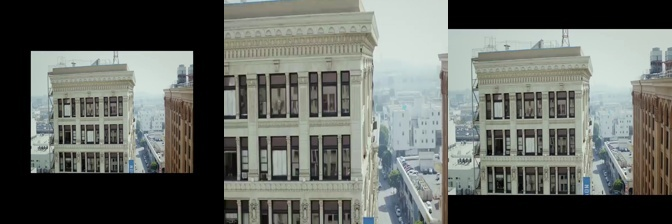
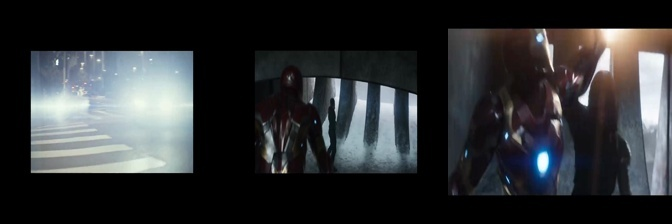
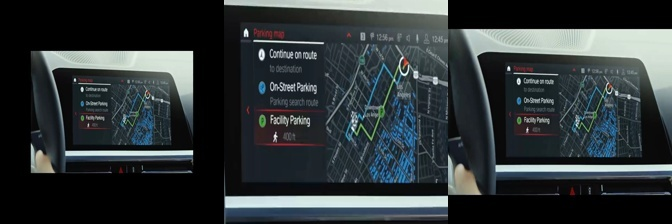
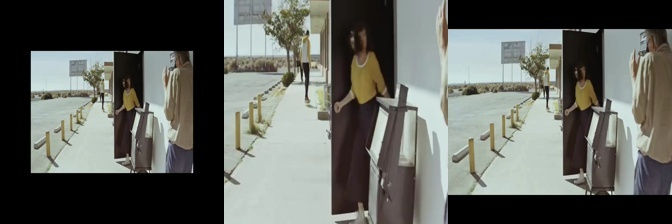
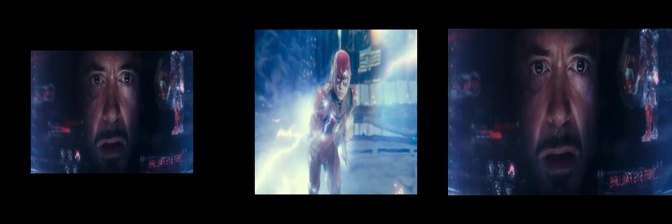
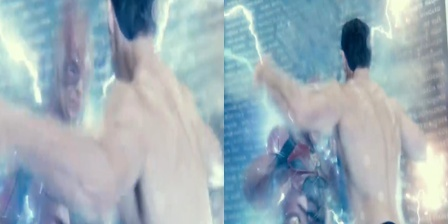
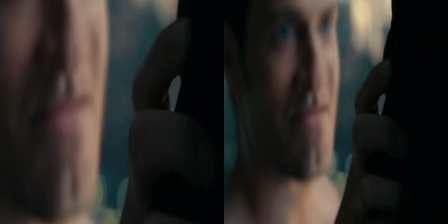
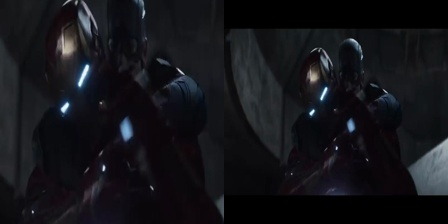
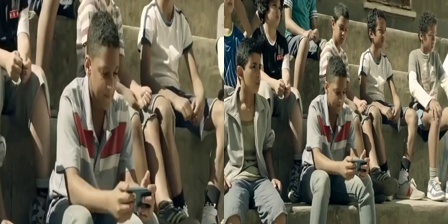
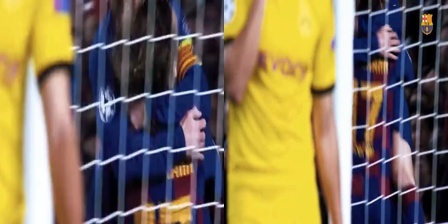
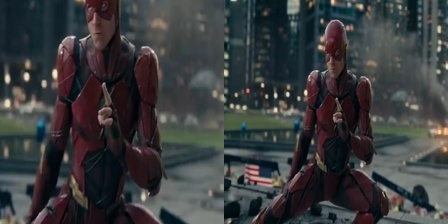
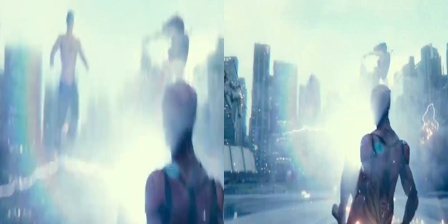
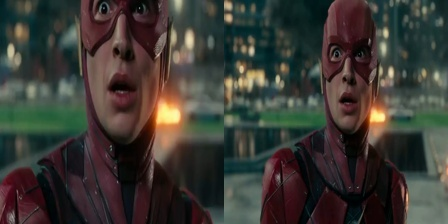
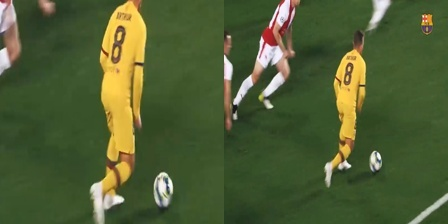

In [ ]:
HTML('./components.html')